In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.datasets
import keras
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical 

In [ ]:
folder_path_cats = 'train/train/cats'
folder_path_dogs = 'train/train/dogs'
folder_path_test = 'test/test'

In [ ]:


fig = plt.figure(figsize=(40, 40))
total = 0


def read_image(folder_path):
    image_data = []
    for filename in os.listdir(folder_path):
        
        # Проверка, является ли файл изображением (можно добавить другие расширения)
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Создание полного пути к файлу
            file_path = os.path.join(folder_path, filename)
            
            # Загрузка изображения с помощью PIL
            image = Image.open(file_path)
            image = image.convert('L')
            image = image.resize((80, 80))

            image_matrix = np.array(image)
            image_data.append(image_matrix)
            
            
    return np.array(image_data)

In [ ]:
cats_data = read_image(folder_path_cats)
dog_data = read_image(folder_path_dogs)

In [ ]:
target_cat = np.zeros((12500, 1))
target_dog = np.ones((12500, 1))

In [ ]:
print(target_cat.shape)
print(target_dog.shape)

In [ ]:
cat_and_dog_data = np.concatenate((cats_data, dog_data), axis = 0)
cat_and_dog_data = cat_and_dog_data / 255
cat_and_dog_target = np.concatenate((target_cat, target_dog), axis = 0)
cat_and_dog_target = to_categorical(cat_and_dog_target)

random_index = np.random.permutation(cat_and_dog_target.shape[0])

cat_and_dog_data = cat_and_dog_data[random_index]
cat_and_dog_target = cat_and_dog_target[random_index]

In [ ]:
data_test = read_image(folder_path_test)

In [ ]:
data_test = data_test / 255

In [ ]:
model = Sequential([
    Flatten(input_shape=(80,80)),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy', 'mse']
)

In [ ]:
model.fit(
    cat_and_dog_data,
    cat_and_dog_target,
    epochs = 300,
shuffle = True,
)

In [ ]:
accuracy = model.history.history['accuracy']
mse = model.history.history['mse']

Last accuracy = 0.8155199885368347


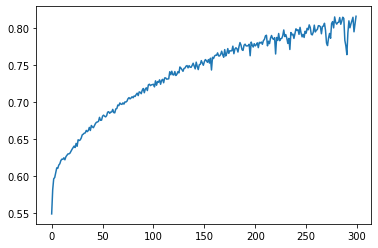

In [22]:
plt.plot(accuracy)
print(f'Last accuracy = {accuracy[-1]}')
plt.show()

Last mse = 0.13968990743160248


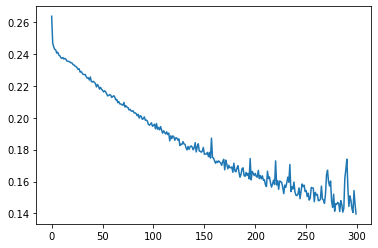

In [23]:
plt.plot(mse)
print(f"Last mse = {mse[-1]}")
plt.show()

In [26]:
prediction_test = model.predict(data_test)

250/250 [==============================] - 1s 2ms/step
